In [1]:
# imporing required packages
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
# set options
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 200)
pd.set_option('display.precision', 2)

In [7]:
# load dataset
df = pd.read_csv('IBM_HR_ATT_data.csv')
df.shape

(1470, 35)

In [8]:
# view top 5 rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [9]:
# get information about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
# get summary stats for the numeric variable
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
# get summary stats for the categorical features
df.describe(include = ['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [12]:
# view value count for "Attrition" feature
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [13]:
# create the feature/flag for Dep variable - Attrition status
df.Attrition = df.Attrition.apply(lambda val: 1 if val == 'Yes' else 0)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [14]:
# explore different features for any kind of inconsistent values
data = df.copy()
features = ['Age', 'YearsWithCurrManager', 'MonthlyIncome', 'JobSatisfaction', 'TotalWorkingYears', 'Education', 'Over18', 
            'YearsWithCurrManager', 'YearsSinceLastPromotion', 'StandardHours' , 'EmployeeCount', 'EmployeeNumber']
for feature in features:
    print(f'{feature}: {sorted(data[feature].unique())}', end='\n\n')

Age: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]

YearsWithCurrManager: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

MonthlyIncome: [1009, 1051, 1052, 1081, 1091, 1102, 1118, 1129, 1200, 1223, 1232, 1261, 1274, 1281, 1359, 1393, 1416, 1420, 1483, 1514, 1555, 1563, 1569, 1601, 1611, 1675, 1702, 1706, 1790, 1859, 1878, 1904, 1951, 2001, 2007, 2008, 2011, 2013, 2014, 2018, 2022, 2024, 2028, 2029, 2033, 2042, 2044, 2045, 2058, 2061, 2062, 2064, 2066, 2070, 2073, 2074, 2075, 2080, 2083, 2086, 2088, 2089, 2090, 2093, 2096, 2097, 2099, 2105, 2107, 2109, 2115, 2119, 2121, 2127, 2132, 2133, 2141, 2143, 2144, 2145, 2148, 2153, 2154, 2157, 2166, 2168, 2174, 2176, 2177, 2180, 2187, 2194, 2201, 2206, 2207, 2210, 2213, 2216, 2218, 2220, 2226, 2231, 2232, 2235, 2238, 2244, 2258, 2259, 2267, 2269, 2270, 2272, 2274, 2275, 2277, 2279, 2285, 2288, 2289, 2290,

In [15]:
# convert the categorical features - creating dummies for all these variables
d_bustrvl = pd.get_dummies(df['BusinessTravel'], prefix='bustrvl')
d_dep = pd.get_dummies(df['Department'], prefix='dep')
d_eduf = pd.get_dummies(df['EducationField'], prefix='eduf')
d_gender = pd.get_dummies(df['Gender'], prefix='gend')
d_jobrole = pd.get_dummies(df['JobRole'], prefix='jobrole')
d_maritstat = pd.get_dummies(df['MaritalStatus'], prefix='maritalstat') 
d_overtime = pd.get_dummies(df['OverTime'], prefix='overtime')

In [16]:
# create the final dataset with all the relevant features - both dependant and predictors
features_final = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate', 'JobInvolvement', 
                  'JobLevel','JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                  'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 
                  'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                  'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']

# creating the final data with all the relevant fields and dependent Variable
df_final = pd.concat([d_bustrvl, d_dep, d_eduf, d_gender, d_jobrole, d_maritstat, d_overtime, df[features_final]], axis=1)
df_final.head()

,bustrvl_Non-Travel,bustrvl_Travel_Frequently,bustrvl_Travel_Rarely,dep_Human Resources,dep_Research & Development,dep_Sales,eduf_Human Resources,eduf_Life Sciences,eduf_Marketing,eduf_Medical,eduf_Other,eduf_Technical Degree,gend_Female,gend_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstat_Divorced,maritalstat_Married,...,overtime_Yes,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,1,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,...,0,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,1,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,...,1,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,...,0,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0


In [17]:
# view final dataframe shape
df_final.shape

(1470, 52)

## EDA

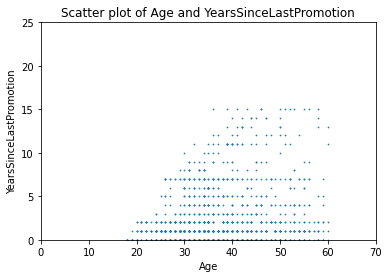

In [21]:
# Scatter Plot Between Age and HourOfTheDay
plt.scatter(df_final['Age'], df_final['YearsSinceLastPromotion'], s=0.5)
plt.title('Scatter plot of Age and YearsSinceLastPromotion')
plt.xlabel('Age')
plt.ylabel('YearsSinceLastPromotion')
plt.xlim(0, 70)
plt.ylim(0, 25)
plt.show()

In [24]:
# Calculating Pearson Correlation Between Age and MonthlyIncome
correlations = df_final[['Age', 'MonthlyIncome']].corr(method='pearson')
correlations

,Age,MonthlyIncome
Age,1.0,0.5
MonthlyIncome,0.5,1.0


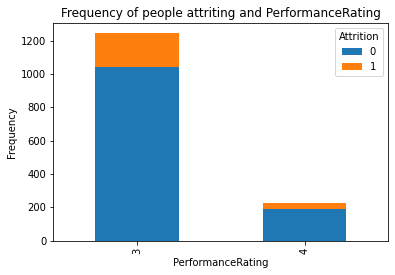

In [25]:
# Effect on Attrition on the Basis of PerformanceRating
data_dow_status = df_final.groupby(['PerformanceRating', 'Attrition'])['PerformanceRating'].count().unstack('Attrition').fillna(0)
data_dow_status[[0, 1]].plot(kind='bar', stacked=True)
plt.title('Frequency of people attriting and PerformanceRating')
plt.xlabel('PerformanceRating')
plt.ylabel('Frequency')
plt.show()

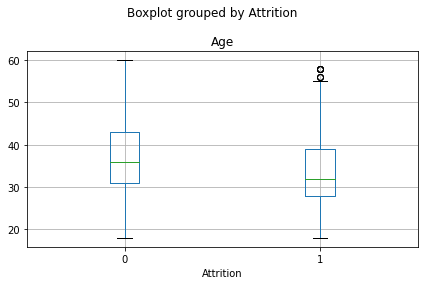

In [39]:
# If age plays any role for attrition
# Plotting Box Plot of Patients’ Age by Status
df_final.boxplot(column=['Age'], return_type='axes', by='Attrition')
plt.tight_layout()
plt.show()

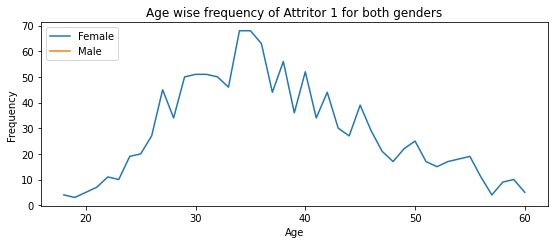

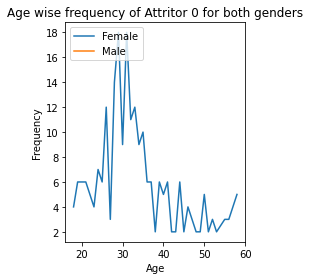

In [40]:
# Plotting Line Plot of Age by Gender for attrition status
df.Gender = df.Gender.apply(lambda x: 1 if x == 'Male' else 0)
plt.figure(figsize=(15, 3.5))
for i, Attrition in enumerate([1, 0]):
    data_show = df[df['Attrition']==i]
    plt.subplot(1, 2, i+1)
    for gender in [0, 1]:
        data_gender = data_show[data_show['Gender']==gender]
        freq_age = data_gender['Age'].value_counts().sort_index()
        freq_age.plot()
    plt.title('Age wise frequency of Attritor %s for both genders'%Attrition)
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend(['Female', 'Male'], loc='upper left')
    plt.tight_layout()
    plt.show()

In [36]:
# Get an idea about the event rate/attrition rate
df_final['Attrition'].value_counts()/len(df_final)

0    0.84
1    0.16
Name: Attrition, dtype: float64

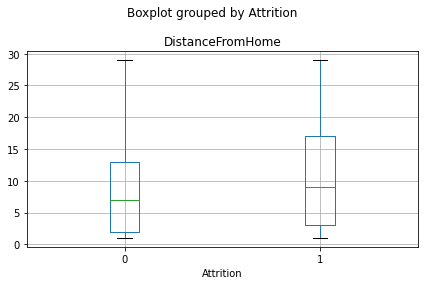

In [38]:
# Plotting Box Plot of DistanceFromHome by Attrition
df_final.boxplot(column=['DistanceFromHome'], return_type='axes', by='Attrition')
plt.tight_layout()
plt.show()

In [41]:
# We can do some further EDA for a pool of features as well
subset_attributes = ['Age', 'DistanceFromHome', 'Education', 'MonthlyIncome', 'TotalWorkingYears','YearsWithCurrManager',
                     'YearsWithCurrManager', 'PerformanceRating','JobSatisfaction']
att_yes = round(df_final[df_final['Attrition'] == 1][subset_attributes].describe(),2)
att_no = round(df_final[df_final['Attrition'] == 0][subset_attributes].describe(),2)
pd.concat([att_yes, att_no], axis=1, keys=['Attritor', 'Non Attritor'])

Attritor                                                                                                                                        Non Attritor                             \
           Age DistanceFromHome Education MonthlyIncome TotalWorkingYears YearsWithCurrManager YearsWithCurrManager PerformanceRating JobSatisfaction          Age DistanceFromHome Education   
count   237.00           237.00    237.00        237.00            237.00               237.00               237.00            237.00          237.00      1233.00          1233.00   1233.00   
mean     33.61            10.63      2.84       4787.09              8.24                 2.85                 2.85              3.16            2.47        37.56             8.92      2.93   
std       9.69             8.45      1.01       3640.21              7.17                 3.14                 3.14              0.36            1.12         8.89             8.01      1.03   
min      18.00             1.00      1.00       1009.00              0.00                 0.00                 0.00              3.00            1.00        18.00             1.00      1.00   
25%      28.00             3.00      2.00       2373.00              3.00                 0.00                 0.00              3.00            1.00        31.00             2.00      2.00   
50%      32.00             9.00      3.00       3202.00              7.00                 2.00                 2.00              3.00            3.00        36.00             7.00      3.00   
75%      39.00            17.00      4.00       5916.00             10.00                 5.00                 5.00              3.00            3.00        43.00            13.00      4.00   
max      58.00            29.00      5.00      19859.00             40.00                14.00                14.00              4.00            4.00        60.00            29.00      5.00   

                                                                                                                   
      MonthlyIncome TotalWorkingYears YearsWithCurrManager YearsWithCurrManager PerformanceRating JobSatisfaction  
count       1233.00           1233.00              1233.00              1233.00           1233.00         1233.00  
mean        6832.74             11.86                 4.37                 4.37              3.15            2.78  
std         4818.21              7.76                 3.59                 3.59              0.36            1.09  
min         1051.00              0.00                 0.00                 0.00              3.00            1.00  
25%         3211.00              6.00                 2.00                 2.00              3.00            2.00  
50%         5204.00             10.00                 3.00                 3.00              3.00            3.00  
75%         8834.00             16.00                 7.00                 7.00              3.00            4.00  
max        19999.00             38.00                17.00                17.00              4.00            4.00

In [43]:
# Inferential Stats
from scipy import stats
 
F, p = stats.f_oneway(df_final[df_final['Attrition'] == 1]['DistanceFromHome'], 
                      df_final[df_final['Attrition'] == 0]['DistanceFromHome'])
print('ANOVA test for mean DistanceFromHome levels across attrition status')
print('F Statistic:', F, ' p-value:', p, end='\n\n')

F, p = stats.f_oneway(df_final[df_final['Attrition'] == 1]['PerformanceRating'], 
                      df_final[df_final['Attrition'] == 0]['PerformanceRating'])
print('ANOVA test for mean PerformanceRating levels across attrition status')
print('F Statistic:', F, ' p-value:', p)

ANOVA test for mean DistanceFromHome levels across attrition status
F Statistic: 8.968276593814723  p-value: 0.0027930600802132115

ANOVA test for mean PerformanceRating levels across attrition status
F Statistic: 0.012250395534223307  p-value: 0.9118840421067758


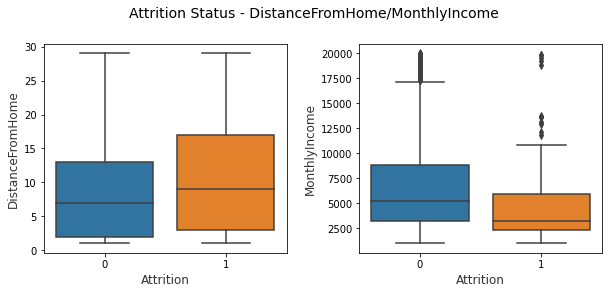

In [44]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
f.suptitle('Attrition Status - DistanceFromHome/MonthlyIncome', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

sns.boxplot(x="Attrition", y="DistanceFromHome", data=df_final, ax=ax1)
ax1.set_xlabel("Attrition",size = 12,alpha=0.8)
ax1.set_ylabel("DistanceFromHome",size = 12,alpha=0.8)

sns.boxplot(x="Attrition", y="MonthlyIncome", data=df_final, ax=ax2)
ax2.set_xlabel("Attrition",size = 12,alpha=0.8)
ax2.set_ylabel("MonthlyIncome",size = 12,alpha=0.8)

plt.show()

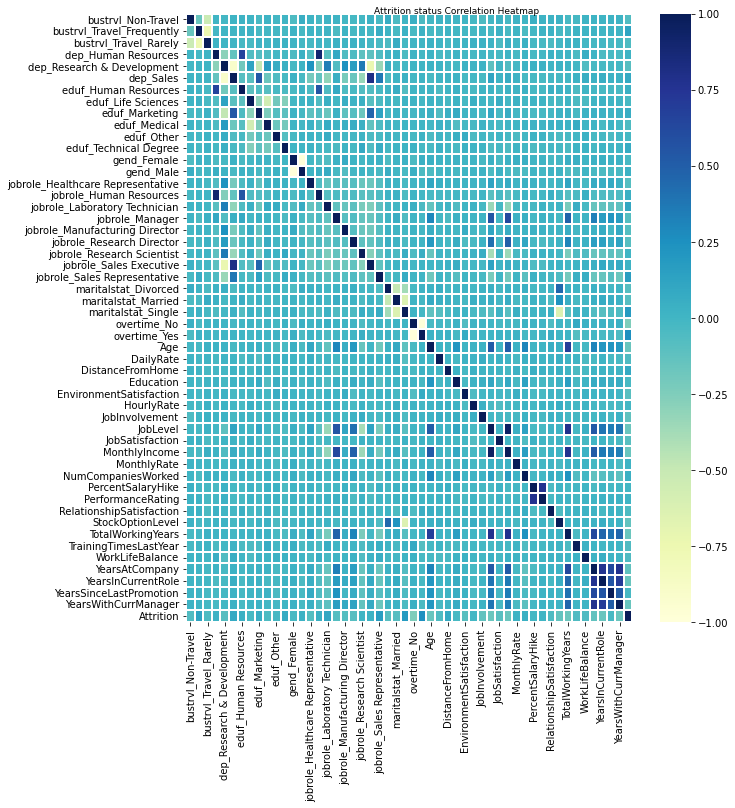

In [52]:
# Multi-Variate Analysis
f, ax = plt.subplots(figsize=(10, 10))
corr = df_final.corr(method='pearson')
hmap = sns.heatmap(round(corr,2), annot=False, ax=ax, fmt='0.0001f', linewidths=2 , cmap='YlGnBu')
f.subplots_adjust(top=0.97)
t_o= f.suptitle('Attrition status Correlation Heatmap', fontsize=9)

In [53]:
# Finding the Correlation values for all the features
(round(df_final.corr(),2))

,bustrvl_Non-Travel,bustrvl_Travel_Frequently,bustrvl_Travel_Rarely,dep_Human Resources,dep_Research & Development,dep_Sales,eduf_Human Resources,eduf_Life Sciences,eduf_Marketing,eduf_Medical,eduf_Other,eduf_Technical Degree,gend_Female,gend_Male,jobrole_Healthcare Representative,jobrole_Human Resources,jobrole_Laboratory Technician,jobrole_Manager,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstat_Divorced,maritalstat_Married,maritalstat_Single,overtime_No,overtime_Yes,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
bustrvl_Non-Travel,1.00,-0.16,-0.53,-0.00,-0.01,0.01,0.02,0.01,-0.03,0.01,-0.01,0.00,-0.05,0.05,0.01,-0.02,0.01,0.01,-0.01,-0.02,-0.01,0.03,-0.03,0.06,-0.04,-0.00,0.04,-0.04,-0.01,0.01,0.02,0.00,0.00,-0.02,-0.05,-0.01,0.02,-0.02,0.02,0.00,0.04,0.02,0.02,0.03,-0.03,-0.02,0.01,0.01,0.01,0.02,0.02,-0.07
bustrvl_Travel_Frequently,-0.16,1.00,-0.75,-0.01,0.00,-0.00,0.01,0.03,-0.02,-0.01,-0.01,-0.02,0.02,-0.02,0.01,0.00,0.01,-0.04,0.01,-0.02,-0.00,-0.01,0.06,0.01,-0.03,0.03,-0.03,0.03,-0.02,-0.01,0.01,-0.01,-0.01,-0.02,0.00,-0.02,0.03,-0.03,0.00,-0.04,-0.01,0.02,0.03,-0.02,-0.01,0.01,0.01,0.01,0.00,0.02,0.01,0.12
bustrvl_Travel_Rarely,-0.53,-0.75,1.00,0.01,0.00,-0.00,-0.02,-0.03,0.03,-0.00,0.02,0.02,0.01,-0.01,-0.02,0.01,-0.01,0.03,0.00,0.03,0.01,-0.01,-0.03,-0.04,0.06,-0.02,0.00,-0.00,0.03,0.00,-0.02,0.00,0.01,0.03,0.03,0.02,-0.04,0.04,-0.01,0.03,-0.02,-0.03,-0.04,-0.01,0.03,0.01,-0.01,-0.02,-0.01,-0.03,-0.02,-0.05
dep_Human Resources,-0.00,-0.01,0.01,1.00,-0.29,-0.14,0.65,-0.07,-0.07,-0.05,-0.01,-0.02,-0.04,0.04,-0.07,0.90,-0.10,0.09,-0.07,-0.05,-0.11,-0.11,-0.05,0.02,0.03,-0.05,0.01,-0.01,0.02,-0.03,-0.01,0.01,-0.01,-0.02,0.00,-0.01,-0.02,0.01,-0.02,0.02,-0.03,-0.01,0.03,-0.00,0.01,-0.04,0.05,0.01,-0.04,-0.03,-0.03,0.02
dep_Research & Development,-0.01,0.00,0.00,-0.29,1.00,-0.91,-0.19,0.13,-0.48,0.18,0.06,0.04,-0.02,0.02,0.23,-0.26,0.34,-0.07,0.24,0.17,0.36,-0.73,-0.34,0.04,-0.02,-0.01,0.00,-0.00,0.02,0.01,-0.01,-0.02,0.03,0.02,0.02,-0.11,-0.00,-0.06,-0.01,0.02,0.03,0.03,-0.00,0.02,0.01,-0.01,-0.07,-0.03,-0.03,-0.02,-0.01,-0.09
dep_Sales,0.01,-0.00,-0.00,-0.14,-0.91,1.00,-0.09,-0.10,0.53,-0.17,-0.06,-0.03,0.03,-0.03,-0.21,-0.13,-0.31,0.04,-0.22,-0.16,-0.33,0.81,0.37,-0.04,0.01,0.03,-0.01,0.01,-0.03,-0.00,0.01,0.01,-0.03,-0.01,-0.03,0.11,0.01,0.06,0.02,-0.03,-0.02,-0.03,-0.01,-0.02,-0.01,0.02,0.05,0.03,0.05,0.03,0.03,0.08
eduf_Human Resources,0.02,0.01,-0.02,0.65,-0.19,-0.09,1.00,-0.11,-0.05,-0.09,-0.03,-0.04,-0.03,0.03,-0.04,0.55,-0.06,0.08,-0.05,-0.03,-0.07,-0.07,-0.03,0.01,0.06,-0.07,-0.00,0.00,0.00,-0.04,-0.00,0.03,-0.01,-0.03,0.00,0.01,-0.02,0.02,0.01,0.03,-0.02,-0.02,0.04,0.02,0.01,-0.04,-0.00,-0.01,-0.03,-0.02,-0.03,0.04
eduf_Life Sciences,0.01,0.03,-0.03,-0.07,0.13,-0.10,-0.11,1.00,-0.29,-0.57,-0.20,-0.26,-0.01,0.01,0.03,-0.06,0.04,-0.01,0.05,0.02,0.04,-0.09,-0.04,-0.00,-0.02,0.02,0.01,-0.01,0.02,0.00,-0.02,0.01,-0.02,0.04,0.00,-0.01,0.05,-0.01,0.03,-0.01,0.01,0.01,-0.02,-0.02,-0.00,-0.04,-0.04,-0.00,0.02,-0.00,0.00,-0.03
eduf_Marketing,-0.03,-0.02,0.03,-0.07,-0.48,0.53,-0.05,-0.29,1.00,-0.24,-0.08,-0.11,0.02,-0.02,-0.11,-0.07,-0.16,0.03,-0.12,-0.08,-0.17,0.46,0.13,-0.01,0.02,-0.01,-0.01,0.01,0.04,-0.06,0.04,0.07,0.00,0.00,-0.02,0.09,-0.02,0.06,-0.01,-0.02,-0.03,-0.02,-0.01,0.02,0.03,-0.03,0.02,0.03,0.03,0.01,0.03,0.06
eduf_Medical,0.01,-0.01,-0.00,-0.05,0.18,-0.17,-0.09,-0.57,-0.24,1.00,-0.17,-0.21,0.01,-0.01,0.03,-0.04,0.07,-0.00,0.04,0.06,0.04,-0.13,-0.05,0.01,-0.01,-0.00,-0.00,0.00,-0.01,0.03,0.01,-0.07,-0.02,-0.02,0.02,-0.01,-0.02,0.00,-0.00,0.02,0.03,0.01,0.03,0.03,0.02,0.07,0.0

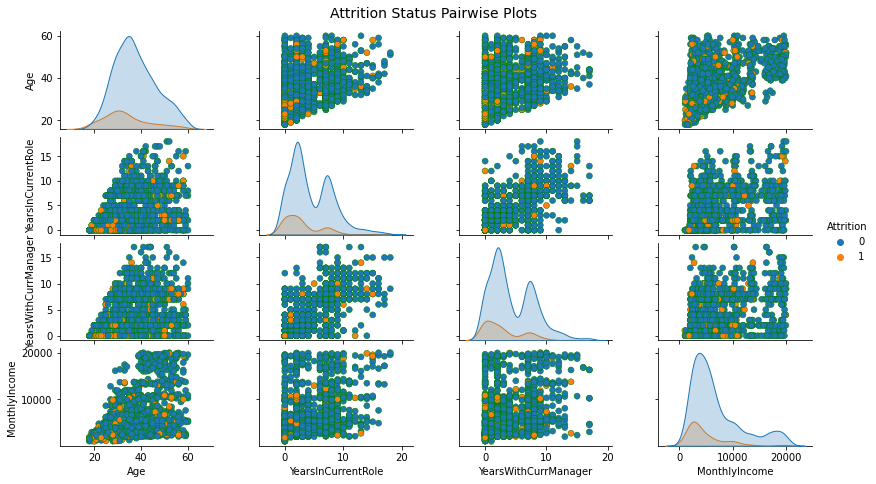

In [54]:
cols = ['Attrition','Age', 'YearsInCurrentRole', 'YearsWithCurrManager','MonthlyIncome']
pp = sns.pairplot(df_final[cols], hue='Attrition', height=1.7, aspect=1.7, plot_kws=dict(edgecolor="green", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Attrition Status Pairwise Plots', fontsize=14)

### Model Building

In [57]:
# Creating Training and Test data
X = df_final.drop(['Attrition'],axis=1)
y = df_final['Attrition']
x_train,x_test,y_train,y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [58]:
print(x_train.shape)
print(x_test.shape)

(1029, 51)
(441, 51)


In [59]:
# We are first building a model with default parameters for RandomForestClassifier()
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=1)
clf_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [60]:
# Declaring a Function to Detect Model’s Accuracy 
def model_perf(model_name, x_train, y_train, y_test, y_pred):
    print ('Model name: %s'%model_name)
    print ('Test accuracy (Accuracy Score): %f'%metrics.accuracy_score(y_test, y_pred))
    print ('Test accuracy (ROC AUC Score): %f'%metrics.roc_auc_score(y_test, y_pred))
    
    fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, y_pred)
    print ('Area Under the Precision-Recall Curve: %f'%metrics.auc(fpr, tpr))
    
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Model name: Decision tree classifier
Test accuracy (Accuracy Score): 0.839002
Test accuracy (ROC AUC Score): 0.564560
Area Under the Precision-Recall Curve: 0.315405


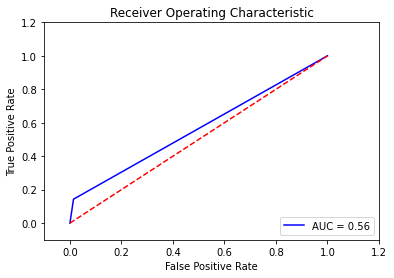

In [61]:
# Finding Accuracy of Decision Tree Classifier
y_pred = clf_rf.predict(x_test)
model_perf('Decision tree classifier', x_train, y_train, y_test,y_pred)

### Hyper-parameters Tuning for the RF model

In [62]:
# Grid Search for dealing with Overfitting Problem
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pipeline = Pipeline([
        ('clf_rf', RandomForestClassifier(criterion='gini'))
    ])
parameters = {
    'clf_rf__n_estimators' :(10,50,200,500),
    'clf_rf__max_depth' :(5,10,20,50),
    'clf_rf__min_samples_split':(2,3,4),
    'clf_rf__min_samples_leaf': (1,2,3),
    'clf_rf__max_features': ['auto', None, 'log2','sqrt']
}

In [66]:
grid_search = GridSearchCV(pipeline, parameters, cv=2, verbose=1, scoring='precision')
grid_search.fit(x_train, y_train)

Fitting 2 folds for each of 576 candidates, totalling 1152 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('clf_rf', RandomForestClassifier())]),
             param_grid={'clf_rf__max_depth': (5, 10, 20, 50),
                         'clf_rf__max_features': ['auto', None, 'log2', 'sqrt'],
                         'clf_rf__min_samples_leaf': (1, 2, 3),
                         'clf_rf__min_samples_split': (2, 3, 4),
                         'clf_rf__n_estimators': (10, 50, 200, 500)},
             scoring='precision', verbose=1)

In [67]:
print(grid_search.best_params_)

{'clf_rf__max_depth': 5, 'clf_rf__max_features': 'auto', 'clf_rf__min_samples_leaf': 3, 'clf_rf__min_samples_split': 3, 'clf_rf__n_estimators': 50}


In [68]:
# Training the Model by Applying Decision Tree Classifier
clf_rf_best = RandomForestClassifier(n_estimators=50, 
                                     criterion="gini",
                                     max_depth=5,
                                     min_samples_split=3,
                                     max_features='auto',
                                     bootstrap=True,
                                     class_weight = {0:0.3,1:0.7},
                                     min_samples_leaf=3,
                                     random_state=1)
clf_rf_best.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=5,
                       max_features='auto', min_samples_leaf=3,
                       min_samples_split=3, n_estimators=50, random_state=1)

Model name: Random Forest classifier
Test accuracy (Accuracy Score): 0.861678
Test accuracy (ROC AUC Score): 0.629496
Area Under the Precision-Recall Curve: 0.429099


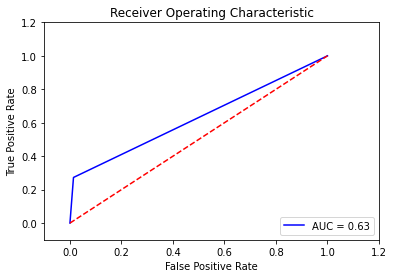

In [69]:
# Finding Accuracy of Decision Tree Classifier
y_pred = clf_rf_best.predict(x_test)
model_perf('Random Forest classifier', x_train, y_train, y_test,y_pred)

### Model Performance Measures

In [70]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [83]:
def get_metrics(true_labels, predicted_labels):
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels),2))
    print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels,average='weighted'),2))
    print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels,average='weighted'),2))
    print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels,average='weighted'),2))

def train_predict_model(classifier, train_features, train_labels, test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions

def confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]
    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, labels=classes)
    mat_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(
                             levels=[['Predicted:'], classes], codes=level_labels), 
                             index=pd.MultiIndex(levels=[['Actual:'], classes], codes=level_labels)) 
    print(mat_frame)

def classification_report(true_labels, predicted_labels, classes=[1,0]):
    report = metrics.classification_report(y_true=true_labels,y_pred=predicted_labels, labels=classes) 
    print(report)

def model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('*'*70)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('Model Classification report:')
    print('*'*70)
    classification_report(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)
    print('Prediction Confusion Matrix:')
    print('*'*70)
    confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels,classes=classes)

In [84]:
model_performance_metrics(true_labels=y_test, predicted_labels=y_pred, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.83
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.81      0.27      0.41        77
           0       0.87      0.99      0.92       364

    accuracy                           0.86       441
   macro avg       0.84      0.63      0.66       441
weighted avg       0.86      0.86      0.83       441

Prediction Confusion Matrix:
**********************************************************************
          Predicted:     
                   1    0
Actual: 1         21   56
        0          5  359


### Generating Decile Report

In [85]:
# Decile Report
def Decile_report(model, X_train, X_test, Y_train,Y_test):
    y_train = model.predict_proba(X_train)
    tab = np.array((y_train[:,1], Y_train)).T
    tabsorted = tab[tab[:,0].argsort()[::-1]]
    tab_bins = np.array_split(tabsorted,10)
    tot_resp = tabsorted[:,1].sum()
    rand_mean = tabsorted[:,1].mean()
    cum_n = 0
    cum_sum = 0
    l1 = []
    for ind,tup in enumerate(tab_bins):
        cum_sum += tup[:,1].sum()
        cum_n += tup[:,0].size
        l1.append([ind,tup[:,0].size,round(tup[:,0].mean(),3),round(tup[:,1].mean(),3),tup[:,1].sum(),cum_sum,round(cum_sum/cum_n,3),round(cum_sum/tot_resp,3),round((cum_sum/cum_n)/rand_mean,3)])
    train_decile = pd.DataFrame(l1,columns = "Decile N pred_mean actual_mean responders cum_responders cum_precision cum_recall lift".split())
    
    y_test = model.predict_proba(X_test)
    tab = np.array((y_test[:,1], Y_test)).T
    tabsorted = tab[tab[:,0].argsort()[::-1]]
    tab_bins = np.array_split(tabsorted,10)
    tot_resp = tabsorted[:,1].sum()
    rand_mean = tabsorted[:,1].mean()
    cum_n = 0
    cum_sum = 0
    
    l2 = []
    for ind,tup in enumerate(tab_bins):
        cum_sum += tup[:,1].sum()
        cum_n += tup[:,0].size
        l2.append([ind,tup[:,0].size,round(tup[:,0].mean(),3),round(tup[:,1].mean(),3),tup[:,1].sum(),cum_sum,round(cum_sum/cum_n,3),round(cum_sum/tot_resp,3),round((cum_sum/cum_n)/rand_mean,3)])
    test_decile = pd.DataFrame(l2,columns = "Decile N pred_mean actual_mean responders cum_responders cum_precision cum_recall lift".split())
    
    return train_decile,test_decile

In [86]:
train_decile, test_decile = Decile_report(clf_rf_best, x_train, x_test, y_train, y_test)

In [87]:
test_decile

,Decile,N,pred_mean,actual_mean,responders,cum_responders,cum_precision,cum_recall,lift
0,0,45,0.54,0.67,30.0,30.0,0.67,0.39,3.82
1,1,44,0.38,0.32,14.0,44.0,0.49,0.57,2.83
2,2,44,0.30,0.23,10.0,54.0,0.41,0.70,2.33
3,3,44,0.25,0.04,2.0,56.0,0.32,0.73,1.81
4,4,44,0.22,0.14,6.0,62.0,0.28,0.81,1.61
5,5,44,0.19,0.18,8.0,70.0,0.26,0.91,1.51
6,6,44,0.17,0.02,1.0,71.0,0.23,0.92,1.32
7,7,44,0.15,0.04,2.0,73.0,0.21,0.95,1.18
8,8,44,0.13,0.04,2.0,75.0,0.19,0.97,1.08
9,9,44,0.10,0.04,2.0,77.0,0.17,1.00,1.00


### Getting the Feature Importance from the RF model

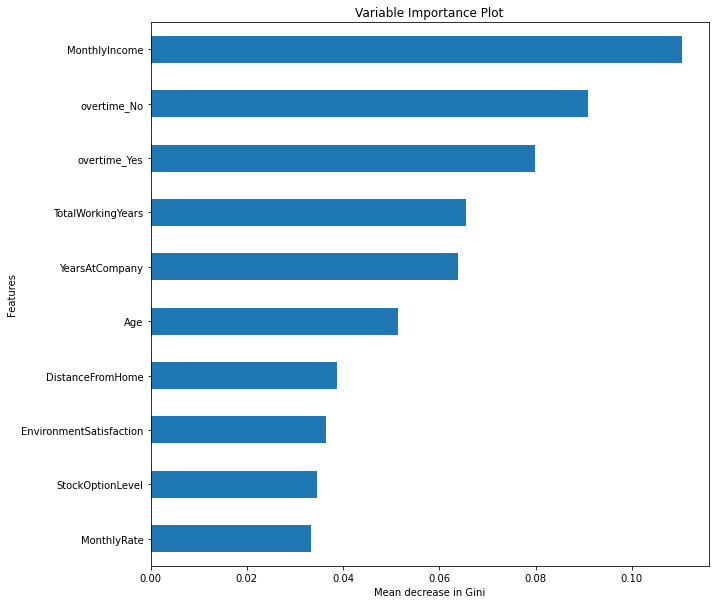

In [88]:
# Plot of Variable importance by mean decrease in gini - Choosing the top 10 features
feature_ranks = pd.Series(clf_rf_best.feature_importances_,index=x_train.columns, name='Importance').sort_values(ascending=False, inplace=False)
feature_ranks.index.name = 'Features'
top_features = feature_ranks.iloc[:10].sort_values(ascending=True,inplace=False)
plt.figure(figsize=(10,10))
ax = top_features.plot(kind='barh')
_ = ax.set_title("Variable Importance Plot")
_ = ax.set_xlabel('Mean decrease in Gini')
_ = ax.set_yticklabels(top_features.index, fontsize=10)
plt.show()

In [90]:
dict(zip(df_final.columns, clf_rf_best.feature_importances_))

{'bustrvl_Non-Travel': 0.00483059759318412,
 'bustrvl_Travel_Frequently': 0.008529604727067422,
 'bustrvl_Travel_Rarely': 0.005808114554462411,
 'dep_Human Resources': 0.0010961256537806816,
 'dep_Research & Development': 0.010817250765417383,
 'dep_Sales': 0.01112415146495799,
 'eduf_Human Resources': 0.0013019382609180815,
 'eduf_Life Sciences': 0.004389183318936469,
 'eduf_Marketing': 0.008067798124719359,
 'eduf_Medical': 0.005832098518237983,
 'eduf_Other': 0.0017886456408530973,
 'eduf_Technical Degree': 0.0012318914057621278,
 'gend_Female': 0.003997915809385783,
 'gend_Male': 0.0058966845211511024,
 'jobrole_Healthcare Representative': 0.003350533374856268,
 'jobrole_Human Resources': 3.9810570283335146e-18,
 'jobrole_Laboratory Technician': 0.008376638660987805,
 'jobrole_Manager': 0.00043231871057542115,
 'jobrole_Manufacturing Director': 0.004032388819589599,
 'jobrole_Research Director': 0.0020321462628268296,
 'jobrole_Research Scientist': 0.006743957377150983,
 'jobrole_S

### Feature Importance using SHAP Score

In [92]:
import shap
shap.initjs()

In [93]:
explainer = shap.TreeExplainer(clf_rf_best, x_train, feature_dependence="independent")
shap_values = explainer.shap_values(x_test)
x_test_array = np.array(x_test)

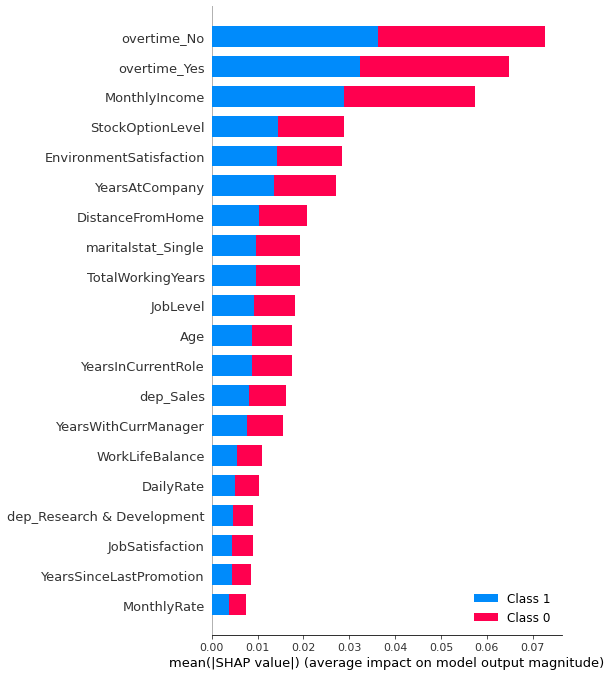

In [94]:
shap.summary_plot(shap_values, x_test_array, feature_names=x_test.columns)